In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

C:\Users\guilh_000\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\guilh_000\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\guilh_000\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
img = cv.imread("C:\\Users\\guilh_000\\Documents\\ISIC-Archive-Downloader-master\\Data\\Images\\ISIC_0000001.jpeg",0)

In [3]:
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

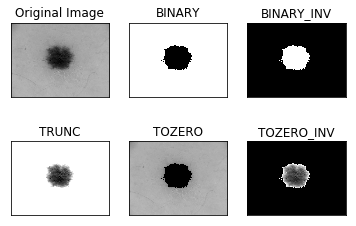

In [4]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [6]:
img2 = cv.imread("C:\\Users\\guilh_000\\Documents\\ISIC-Archive-Downloader-master\\Data\\Images\\ISIC_0000001.jpeg",0)
img2 = cv.medianBlur(img2,5)

In [7]:
ret,th1 = cv.threshold(img2,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img2,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img2,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

In [8]:
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img2, th1, th2, th3]


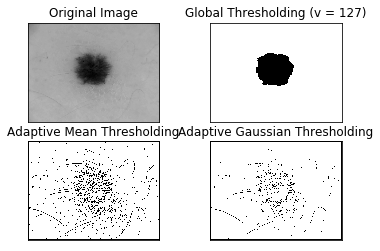

In [9]:
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [18]:
img3 = cv.imread("C:\\Users\\guilh_000\\Documents\\ISIC-Archive-Downloader-master\\Data\\Images\\ISIC_0000001.jpeg",0)

In [19]:
# global thresholding
ret1,th1 = cv.threshold(img3,127,255,cv.THRESH_BINARY_INV)
# Otsu's thresholding
ret2,th2 = cv.threshold(img3,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img3,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

In [20]:
# plot all the images and their histograms
images = [img3, 0, th1,
          img3, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

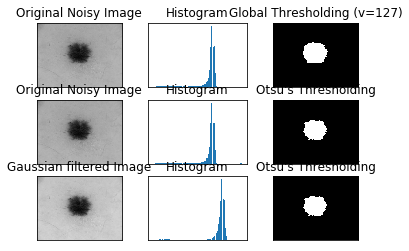

In [21]:
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

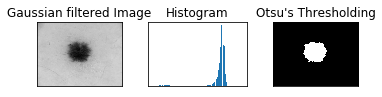

In [31]:
for i in range(2, 3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()
 

In [22]:
target = cv.imread("C:\\Users\\guilh_000\\Documents\\ISIC-Archive-Downloader-master\\Data\\Segmentation\\ISIC_0000001_expert.png",0)

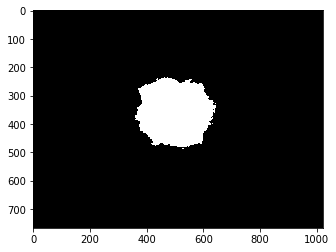

In [23]:
plt.imshow(th3, 'gray')

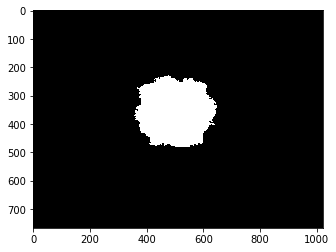

In [24]:
plt.imshow(target, 'gray')

In [9]:
import numpy as np

intersection = np.logical_and(th3, target)
union = np.logical_or(th3, target)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU is %s" % iou_score)

IoU is 0.9489254108723135


In [10]:
import os 
import glob 

img_dir = "C:\\Users\\guilh_000\\Documents\\ISIC-Archive-Downloader-master\\Data\\Images" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
images = [] 
for f1 in files: 
    img = cv.imread(f1, 0) 
    images.append(img)

In [11]:
len(images)

782

In [12]:
###segmented images

img_dir = "C:\\Users\\guilh_000\\Documents\\ISIC-Archive-Downloader-master\\Data\\Segmentation" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
segmented = [] 
for f1 in files: 
    img = cv.imread(f1, 0) 
    segmented.append(img)

In [13]:
len(segmented)

782

In [14]:
# Otsu's thresholding after Gaussian filtering

th_data = []
for i in range(len(images)):
    blur = cv.GaussianBlur(images[i],(5,5),0)
    ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    th_data.append(th3)

In [15]:
iou_data = []
for i in range(len(th_data)):
    intersection = np.logical_and(th_data[i], segmented[i])
    union = np.logical_or(th_data[i], segmented[i])
    iou_score = np.sum(intersection) / np.sum(union)
    #print("IoU is %s" % iou_score)
    iou_data.append(iou_score)

In [35]:
iou_data

[0.8526252610595555,
 0.9489254108723135,
 0.5975630932138142,
 0.9108964931697925,
 0.010357311506374941,
 0.11457790287160566,
 0.32534697599027457,
 0.4249898412162939,
 0.855665387741216,
 0.74938960752961,
 0.66594752499129,
 0.17912928151775281,
 0.5754539573648659,
 0.8083009895127379,
 0.6972796501373317,
 0.6241355972103699,
 0.8712766283524904,
 0.7415303057077222,
 0.7520564014399559,
 0.7383612630093491,
 0.5921628869980804,
 0.704627727856226,
 0.545618784522744,
 0.7552376482873722,
 0.3371008976484714,
 0.8394540263600454,
 0.4422082220252995,
 0.6250770071253385,
 0.7848226450552032,
 0.9128862224635456,
 0.3431985302889318,
 0.24796026229153603,
 0.4367766091104168,
 0.6295952804183734,
 0.7458932473157652,
 0.7793841671334487,
 0.17409315802960715,
 0.6088162821087646,
 0.6291737417384085,
 0.856403384509361,
 0.4003369402444326,
 0.740046072567928,
 0.5955219999628536,
 0.744931325335537,
 0.7666344315099869,
 0.3415999496721989,
 0.6993979887641564,
 0.6014211373183

In [16]:
mean_iou = sum(iou_data)/len(iou_data)
print(mean_iou) 

0.4184263257255111


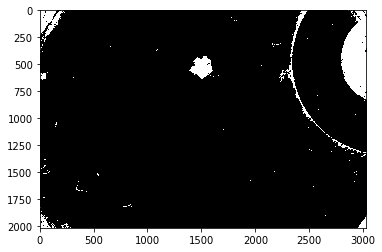

In [25]:
plt.imshow(th_data[600], 'gray')

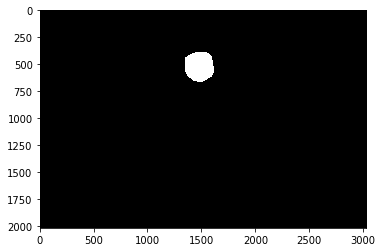

In [26]:
plt.imshow(segmented[600], 'gray')

In [22]:
iou_data[600]

0.09537275581676194

In [37]:
# Otsu's thresholding

th_data2 = []
for i in range(len(images)):
    ret2,th2 = cv.threshold(images[i],0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    th_data2.append(th2)

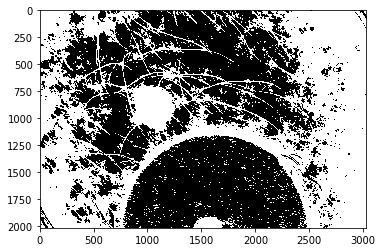

In [27]:
plt.imshow(th_data[750], 'gray')

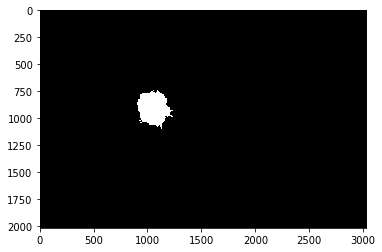

In [28]:
plt.imshow(segmented[750], 'gray')

In [25]:
iou_data[750]

0.02554251230460244

In [38]:
iou_data2 = []
for i in range(len(th_data2)):
    intersection = np.logical_and(th_data2[i], segmented[i])
    union = np.logical_or(th_data2[i], segmented[i])
    iou_score = np.sum(intersection) / np.sum(union)
    #print("IoU is %s" % iou_score)
    iou_data2.append(iou_score)

In [39]:
mean_iou = sum(iou_data2)/len(iou_data2)
print(mean_iou) 

0.5373085490699977


In [40]:
iou_data2

[0.8526089660547892,
 0.9476970834536529,
 0.5973839972207838,
 0.9106918143639038,
 0.011020375462460907,
 0.11498666148246552,
 0.3244870199403814,
 0.42379971041361825,
 0.8553268696490333,
 0.747851728653495,
 0.6589053803339517,
 0.17318335647874764,
 0.5660811593342143,
 0.8083842584668335,
 0.6954020583255655,
 0.6227869173521348,
 0.8712337164750957,
 0.7454098390737105,
 0.7559524534311994,
 0.7465074519662417,
 0.597011563117848,
 0.7063924460872765,
 0.5428353919753693,
 0.7584677017775507,
 0.0,
 0.848810207207701,
 0.4301751592356688,
 0.6175423347819572,
 0.7946144372302136,
 0.9185388092350892,
 0.34243150188007676,
 0.2459185637088931,
 0.42711716529228,
 0.0008755412319136719,
 0.7605378840264744,
 0.7815797649281699,
 0.17420162321300273,
 0.6146659547521583,
 0.6320622712010178,
 0.8632770819736665,
 0.30107618775651435,
 0.763470091994672,
 0.5988769411939042,
 0.7502372653592575,
 0.7727342668102785,
 0.3429218410930712,
 0.7087999747263336,
 0.6024031776173905,
 0

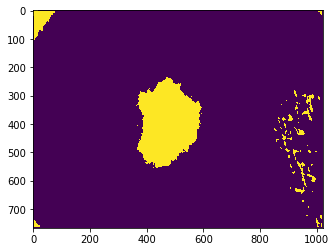

In [47]:
plt.imshow(th_data[10])

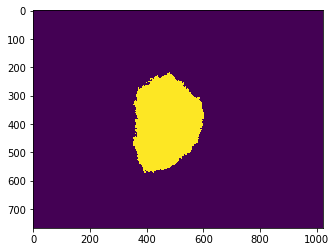

In [48]:
plt.imshow(segmented[10])